# Fisherova-Kolmogorovova rovnice s radiálně symetrickou počáteční podmínkou


*POPSAT NĚJAKOU TEORII, JAK SE DOJDE K ÚPRAVĚ ROVNICE, KDYŽ JE PODMÍNKA RADIÁLNĚ SYMETRICKÁ - VIIZ PŘEDNÁŠKA*

*POPSAT JAK SE V TAKOVÉM PŘÍPADĚ ŘEŠENÍ CHOVÁ - NEJDŘÍV SE VYHLADÍ A PAK SE ŠÍŘÍ RYCHLOSTÍ XX - TA ÚVODNÍ RYCHLOST MŮŽE BÝT I MENŠÍ NEŽ 2, DOKUD SE NEFORMUJE VLNA*

*NUMERICKÉ EXPERIMENTY NA RŮZNÝCH POČÁTEČNÍCH PODMÍNKÁCH*
- SKOKOVÁ FUNKCE
- BUMP FUNCTION - KOPEČEK
- JEHLAN
- BUMP FUNKCE S PERTURBACÍ
- BUMP FUNKCE S radiálně nesymetrickou PERTURBACÍ

In [1]:
import pde
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets

plt.rcParams['figure.figsize'] = [10, 10]
plt.style.use("ggplot")
plt.rcParams.update({'font.size': 12})

In [6]:
# funkce řešení úlohy

def fksolve(domain_size=50.,
           grid_size = 300,
           max_time = 9,   # 10 steps, as count starting 0
           dt = 0.001,
           tracker_int = 0.1,
           iv_size = 40,
           iv_func = lambda x, y: 1,
           slice_num = 10,
           ylim = 1.1,
           u_level = 0.2):   # u value to approximate the speed at
   
    # grid 
    grid = pde.CartesianGrid([[0, domain_size]]*2, grid_size)

    
    # axisymmetric initial values
    X = np.linspace(-1.,1.,iv_size)
    Y = np.linspace(-1.,1.,iv_size)
    Z = np.zeros((iv_size,iv_size))
    for i in range(0,iv_size): 
        for j in range(0,iv_size):
            if X[i]**2+Y[j]**2<1:
                Z[i,j] = iv_func(X[i],Y[j])
    x0 = np.zeros(grid.shape)
    lo = int((grid_size - iv_size)/2)
    hi = lo+iv_size
    x0[lo:hi, lo:hi] = Z

    state = pde.ScalarField(grid,x0)
    
    # solve the problem
    eq = pde.PDE(
        {"u": "laplace(u) + u*(1-u)"},
    )
    storage = pde.MemoryStorage()
    tracker = ['progress', storage.tracker(interval=tracker_int)] 
    result = eq.solve(state, t_range=max_time, dt=dt, tracker=tracker)
    
    
    # plot results
    fig = plt.figure(figsize=(20,18))
    ax1 = fig.add_subplot(221)
    ax2 = fig.add_subplot(222)
    ax3 = fig.add_subplot(223)
    ax4 = fig.add_subplot(224)
    
    t_size = len(storage.data)-1
    ts = np.linspace(0, t_size, slice_num, dtype=np.int32)
    
    X = np.linspace(0, domain_size, grid_size)#x_size)
    
    cmap = plt.get_cmap('Blues')
    colors = cmap(np.linspace(.4, 1.0, slice_num))    
    for t, color in zip(ts, colors):
        ax1.plot(X,storage.data[t][int(grid_size/2)], color=color, label='t={:.2f}'.format(t*tracker_int))

    ax1.set_xlabel('x')
    ax1.set_ylabel('u(x,y,t)')
    ax1.set_title('Řezy řešení u(x,y,t) v x={:.2f}'.format(domain_size/2))
    ax1.set_xlim([0,domain_size])
    ax1.set_ylim([0,ylim])   
    ax1.legend()
    
    result.plot(cmap='Blues', clim=(0,1), ax=ax2, title='Řešení u(x,y,t) v čase t={}'.format(max_time))
    
    # approximate the c(r) speed
    t_size = len(storage.data)
    r_t = np.zeros(t_size)
    for t in range(t_size):
        r_data = storage.data[t][int(grid_size/2)]
        r_t[t] = np.argwhere(r_data>u_level)[-1][0] * (domain_size/grid_size)

    x = np.linspace(0, max_time, len(r_t))
    z = np.polyfit(x,r_t,5)
    p = np.poly1d(z)
    p = p.deriv()

    ax3.plot(x, p(x), color='#0000AA', linewidth=2)
    ax3.set_xlabel('t')
    ax3.set_ylabel('c(x,y,t)')
    ax3.set_title('Aproximace rychlosti pravé části vlny v u(x,y,t)={}'.format(u_level))
    
    ax4.plot(x, np.gradient(r_t)/(max_time/t_size), 'bx:')
    ax4.set_xlabel('t')
    ax4.set_ylabel('c(x,y,t)')
    ax4.set_title('Numerická rychlost pravé části vlny v u(x,y,t)={}'.format(u_level))

    plt.show()

    return result, storage

## Numerické experimenty

Bump function

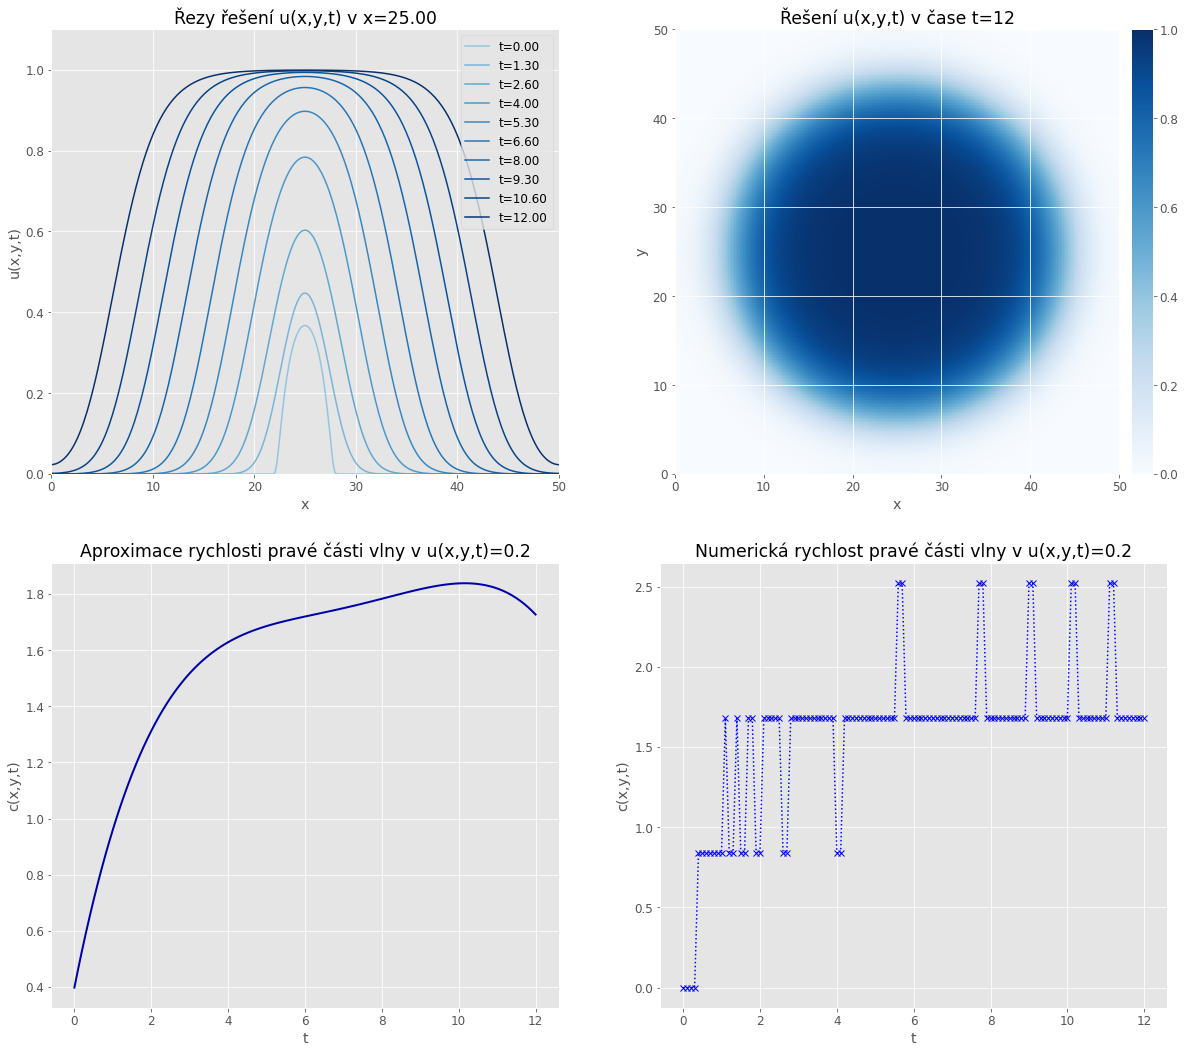

In [20]:
#bump function
result, storage = fksolve(max_time=12, iv_func=lambda x,y: np.exp(-1/(1-x**2-y**2)))

Bump function s výškou = 1

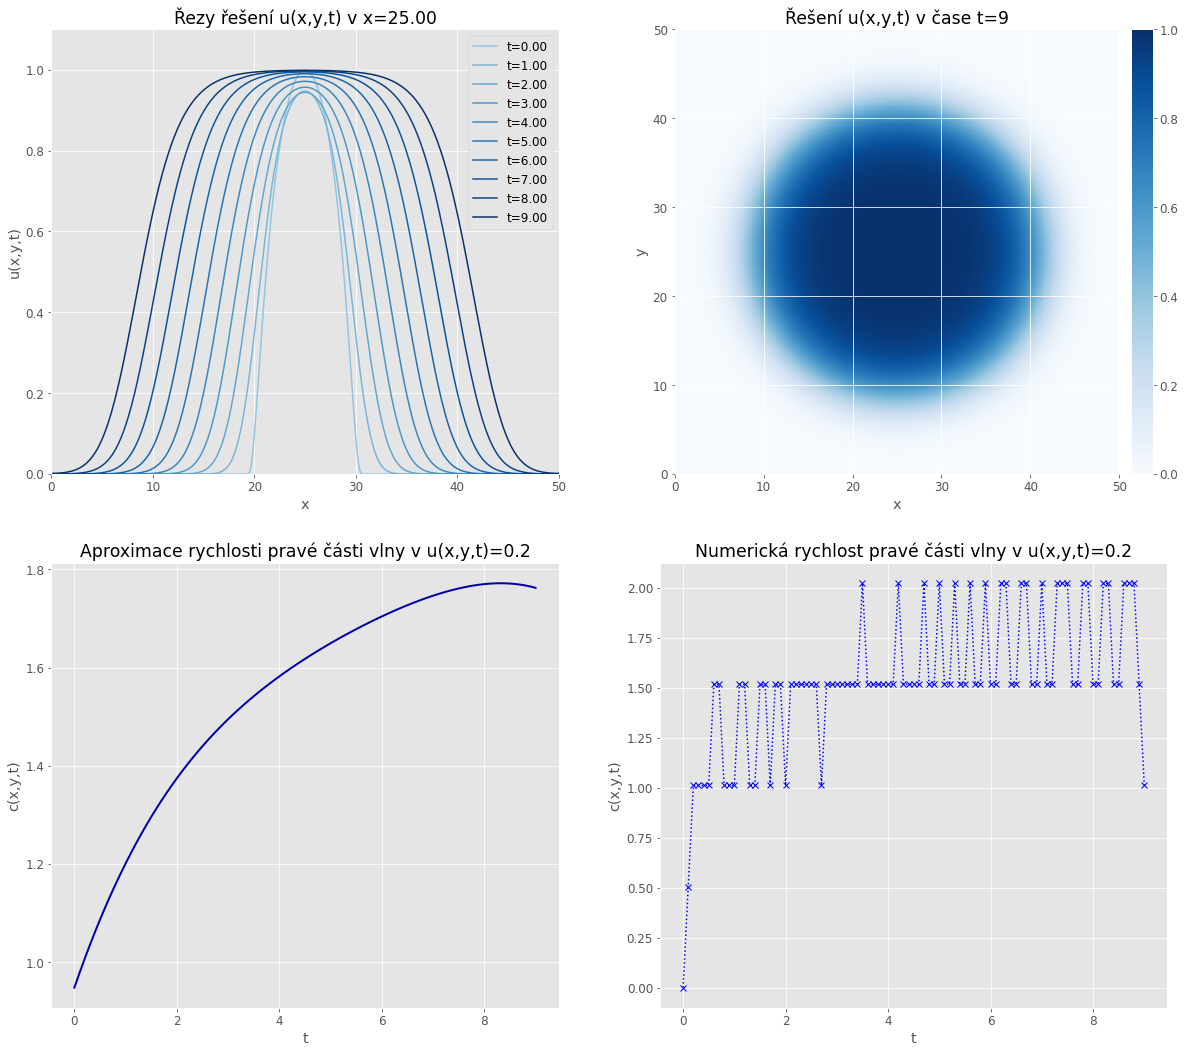

In [21]:
#bump function, size 120, size 1
result, storage = fksolve(grid_size=500,
                          iv_size=120,
                 iv_func=lambda x,y: np.exp(1)*np.exp(-1/(1-x**2-y**2)))

Skoková funkce

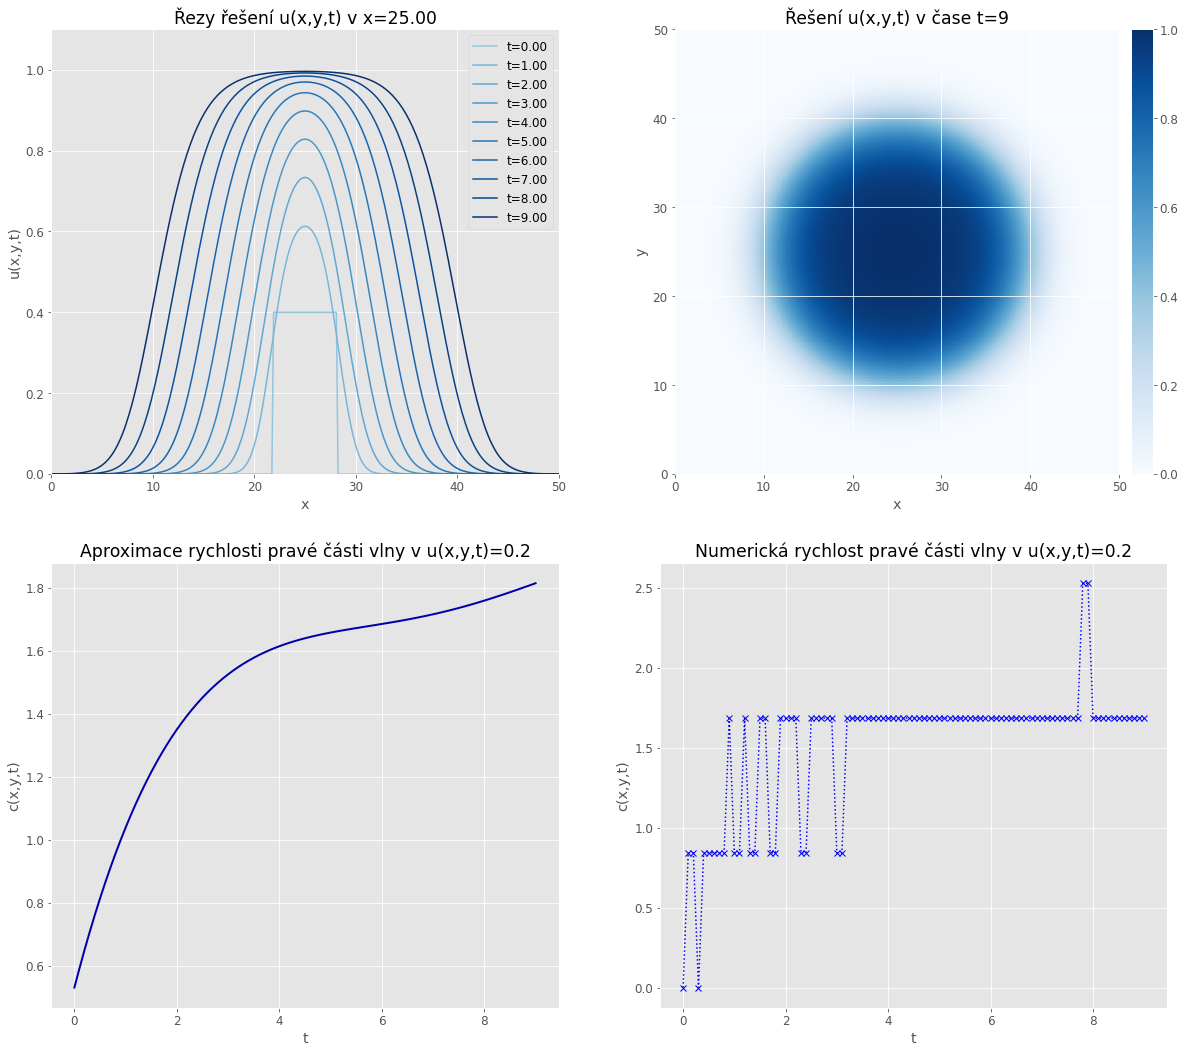

In [19]:
result = fksolve(iv_func = lambda x,y: .4)

Skoková funkce, jen na malém kruhu

In [ ]:
result, storage = fksolve(iv_func= lambda x,y: .5, iv_size=5, max_time=12, u_level=0.005)

Skoková funkce > 1

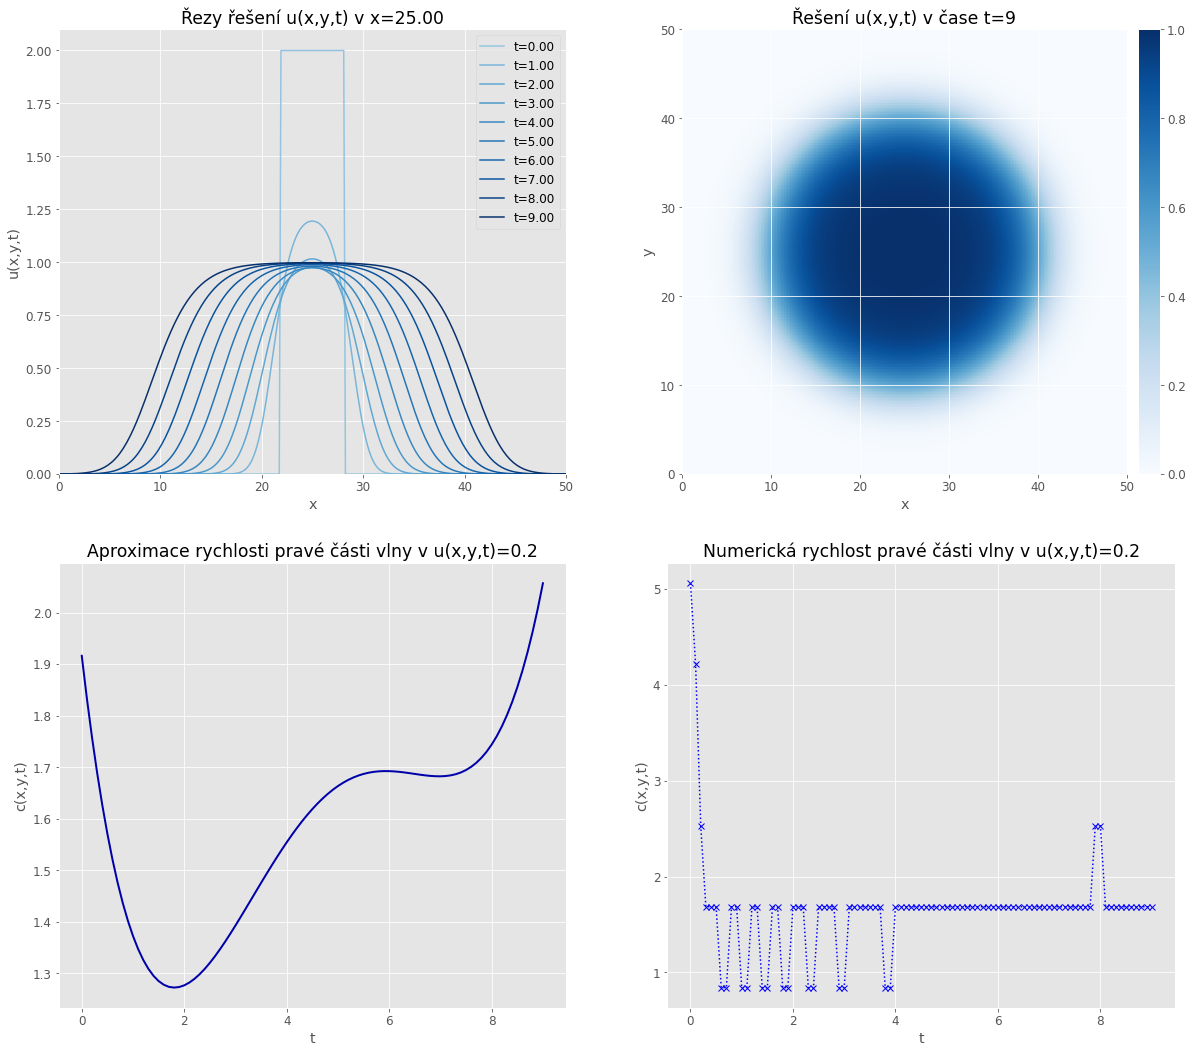

In [23]:
result, storage = fksolve(iv_func= lambda x,y: 2,
                ylim=2.1)

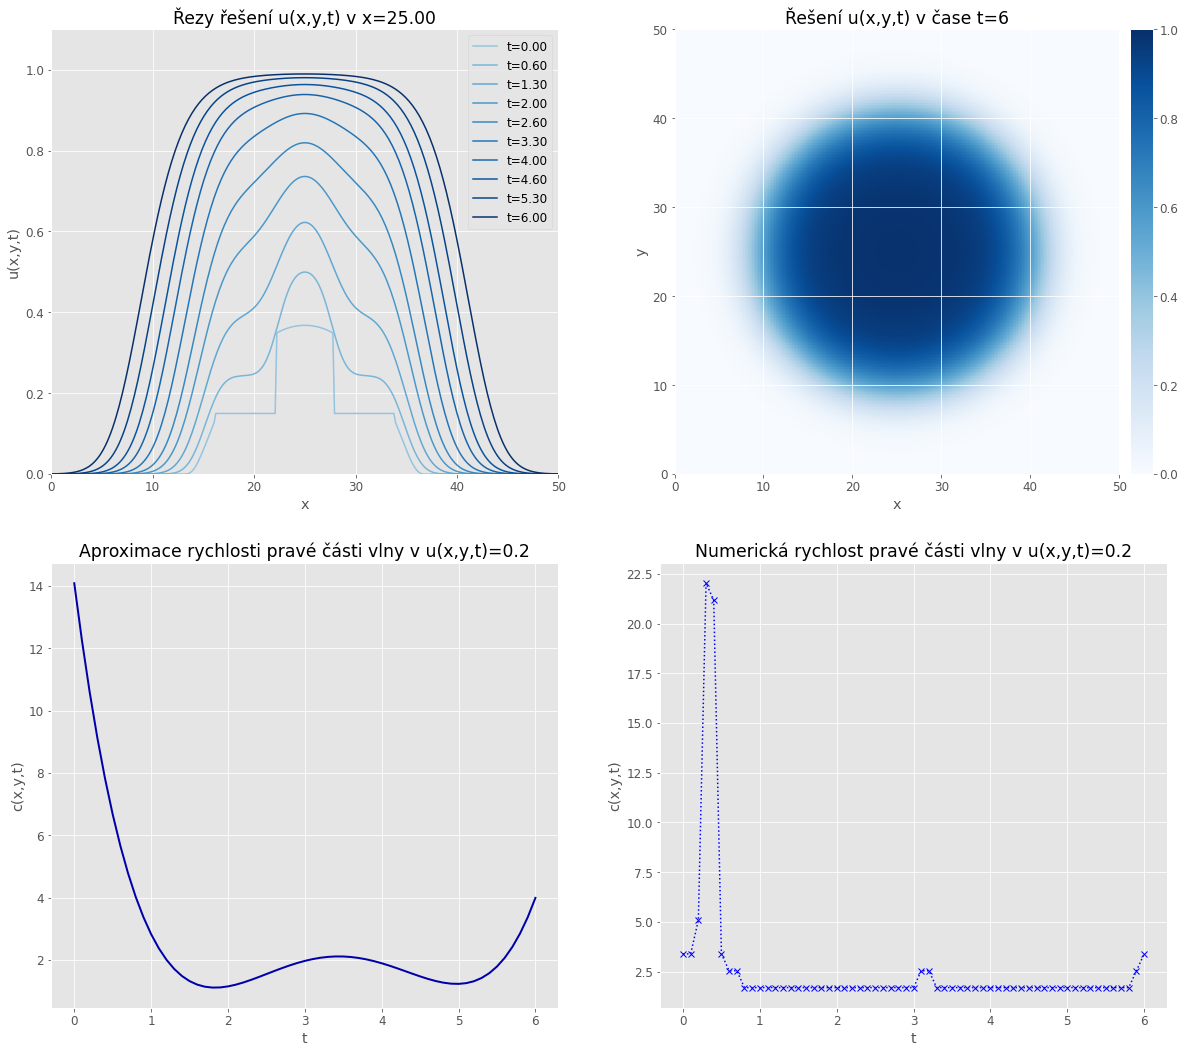

In [7]:
#bump function s perturbací
def ivs(x,y):
    c = x**2+y**2
    #print(c)
    if .05 < c < .5:
        return .15
    else:
        return np.exp(-1/(1-x**2-y**2))


result, storage = fksolve(max_time=6, iv_func=ivs, iv_size=150 )


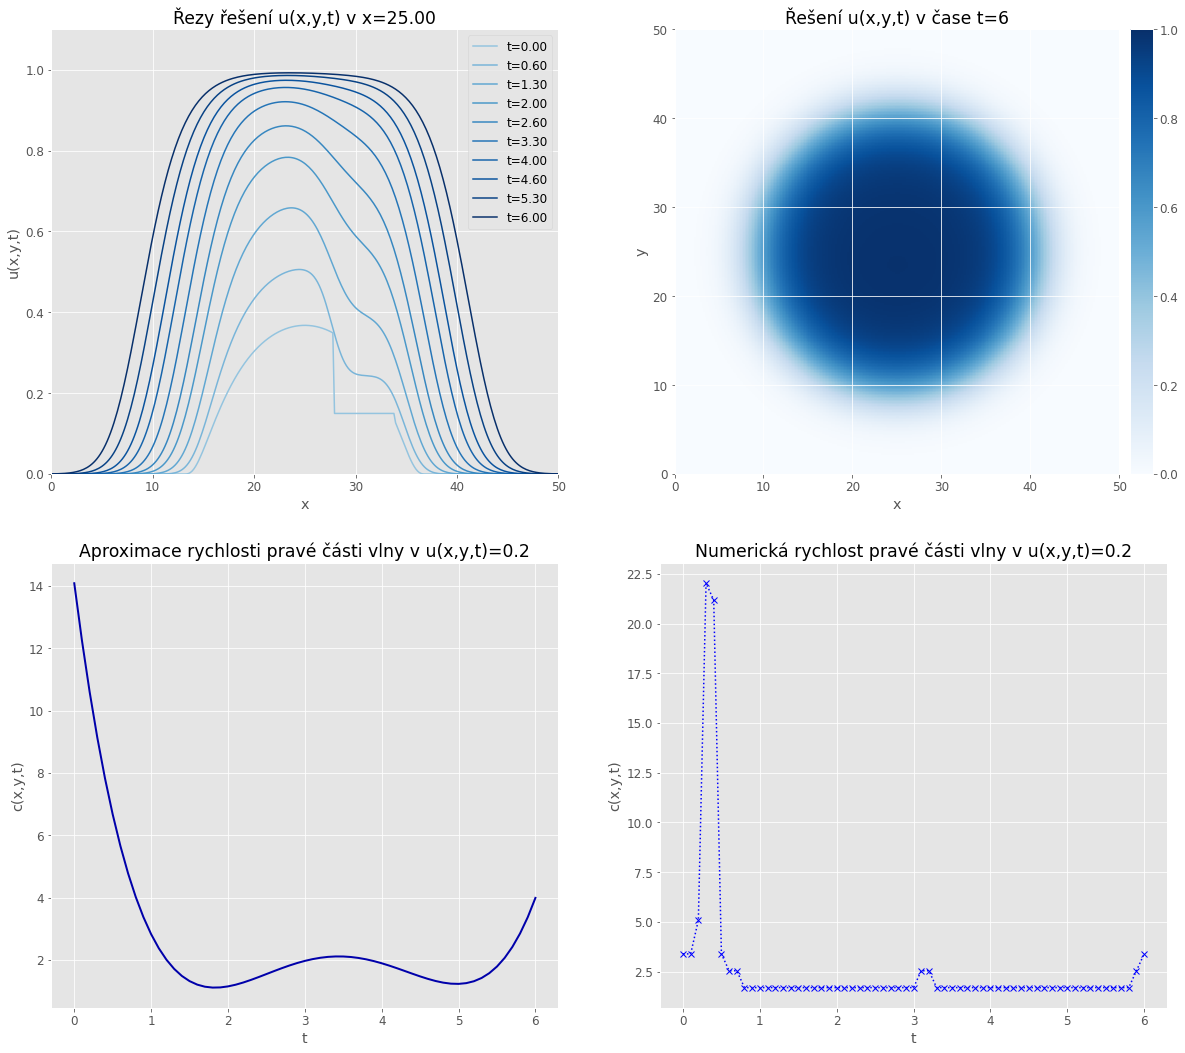

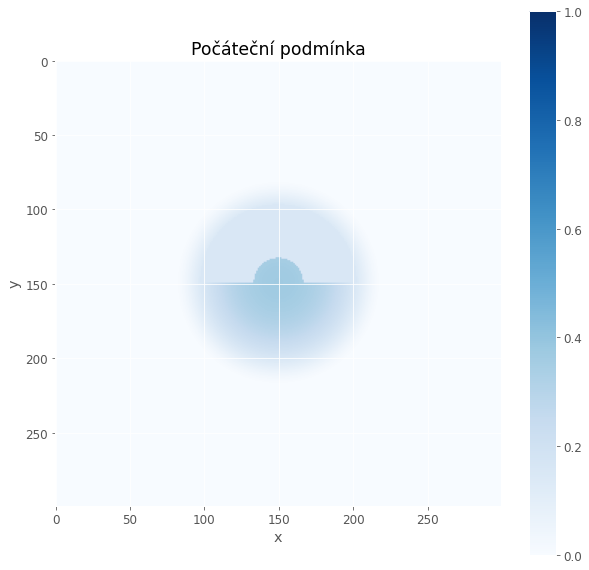

In [17]:
# zkusit totéž co v předchozím případě, ale jen na výseči, podmínka nebude radiálně symetrická
# do podmínky přidat ještě podmínku že x a y jsou kladné

#bump function s NESYMETRICKOU perturbací
def ivs(x,y):
    c = x**2+y**2
    #print(c)
    if (.05 < c < .5) and (y > 0):
        return .15
    else:
        return np.exp(-1/(1-x**2-y**2))


result, storage = fksolve(max_time=6, iv_func=ivs, iv_size=150 )

plt.imshow(np.rot90(storage.data[0]), cmap='Blues', clim=(0,1))
plt.title('Počáteční podmínka')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()
plt.show()

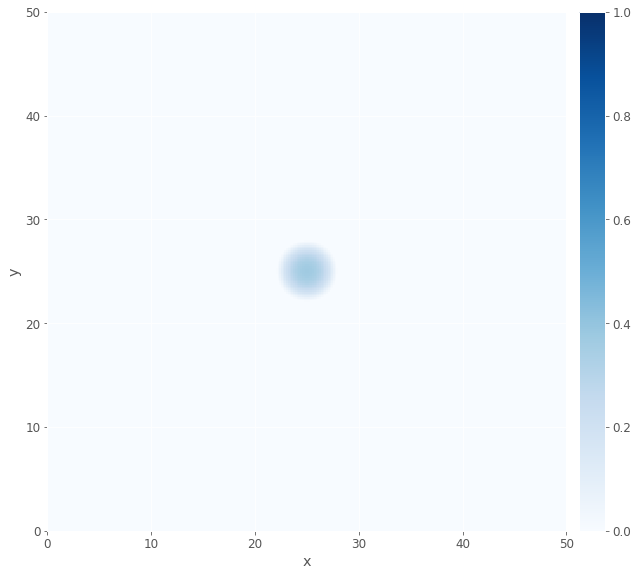

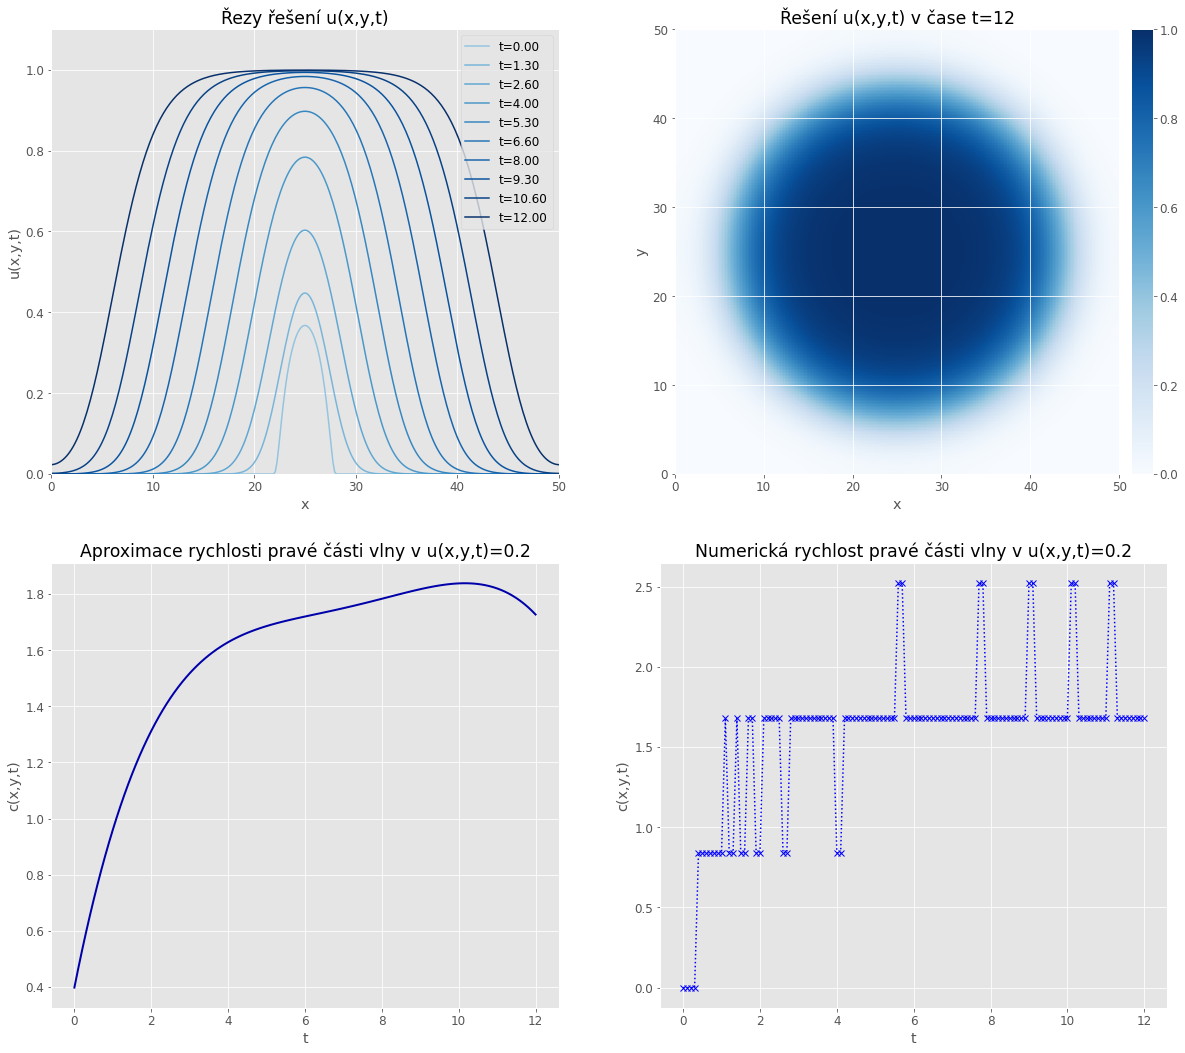

In [30]:
#bump function
result, storage = fksolve(max_time=12, iv_func=lambda x,y: np.exp(-1/(1-x**2-y**2)))

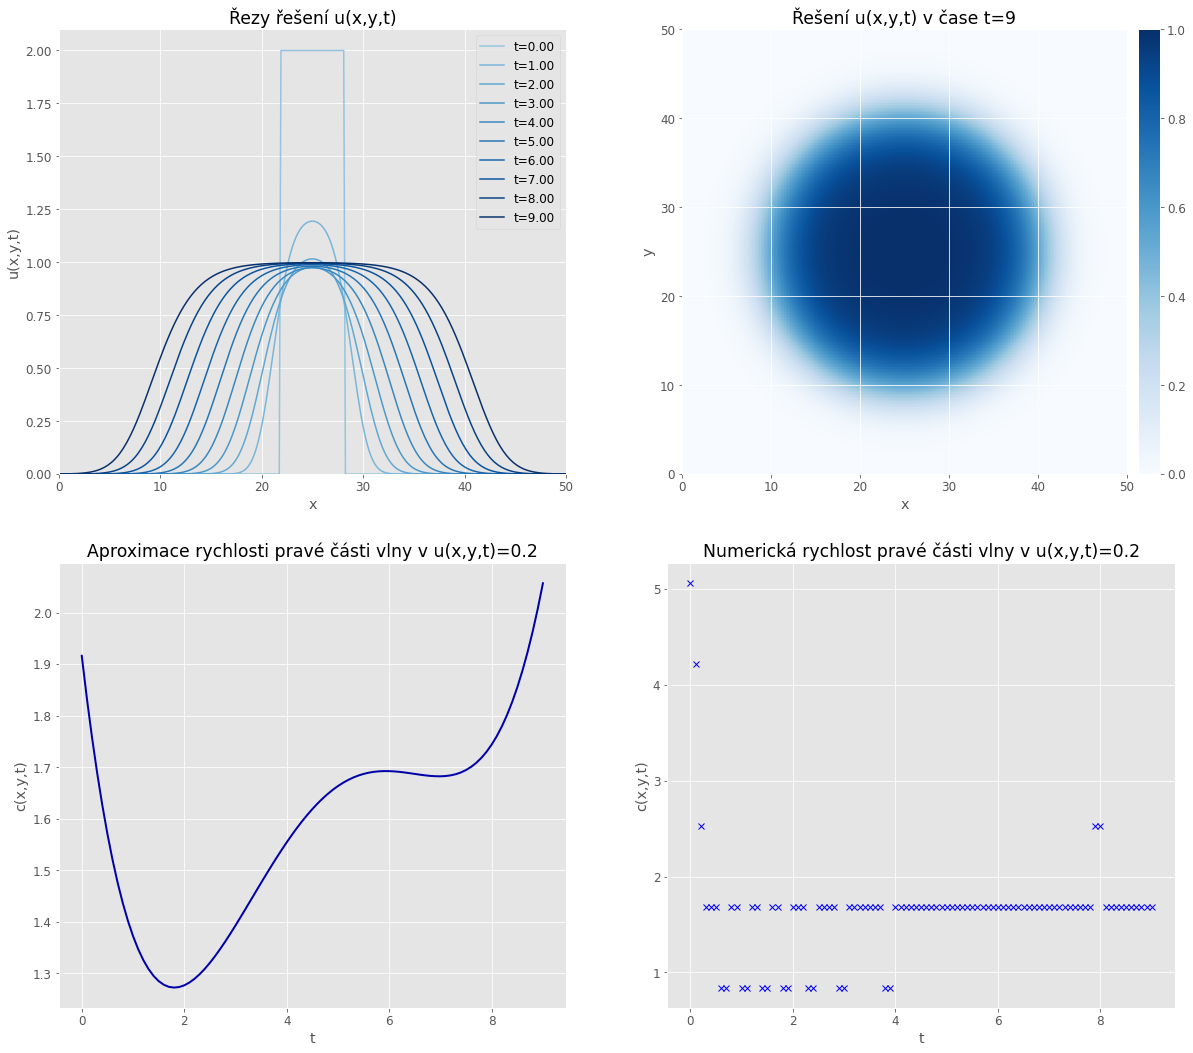

In [5]:
result, storage = fksolve(iv_func= lambda x,y: 2,
                ylim=2.1)

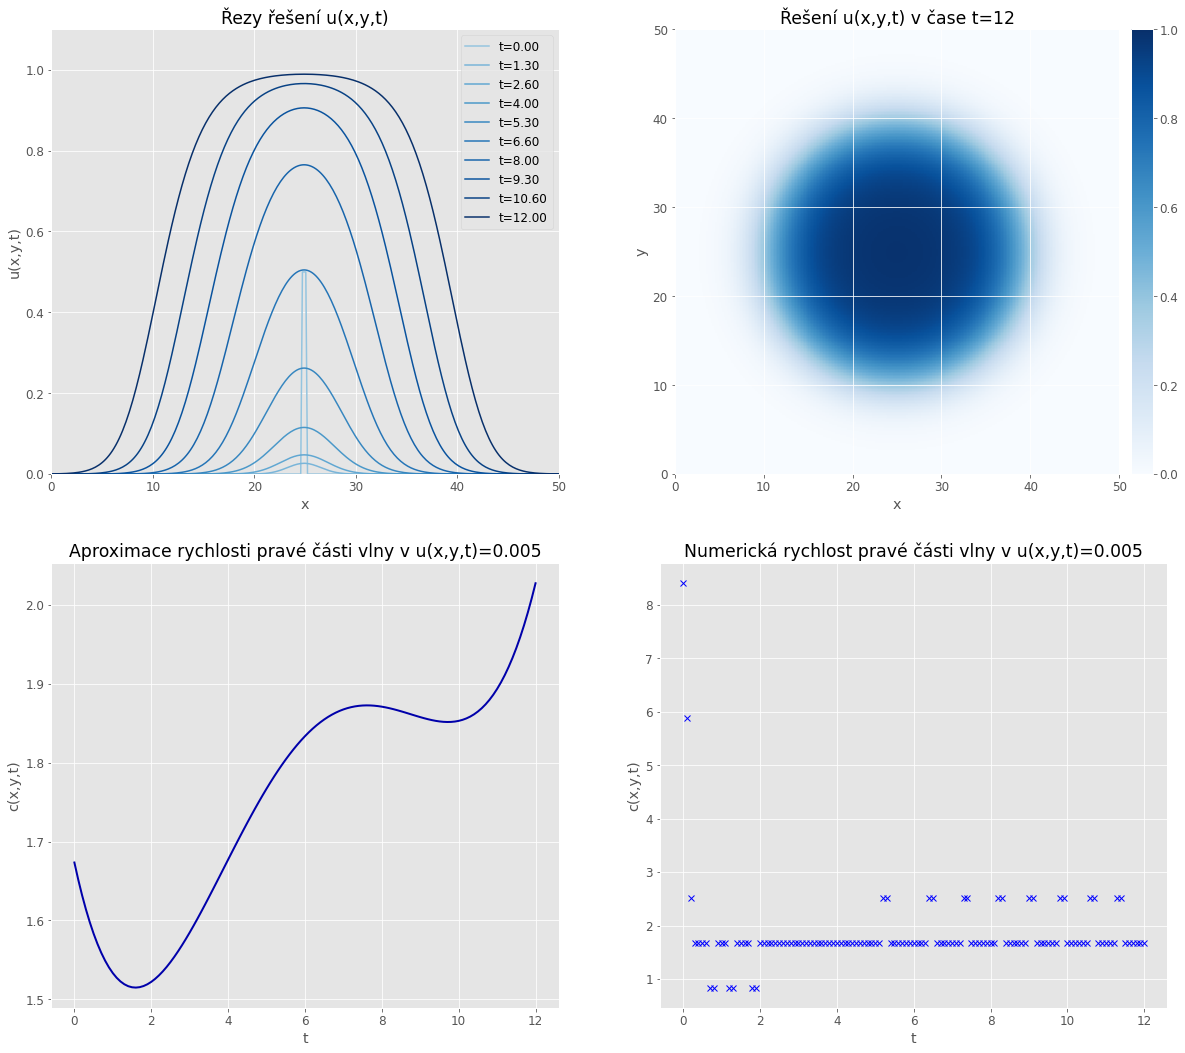

In [6]:
result, storage = fksolve(iv_func= lambda x,y: .5, iv_size=5, max_time=12, u_level=0.005)

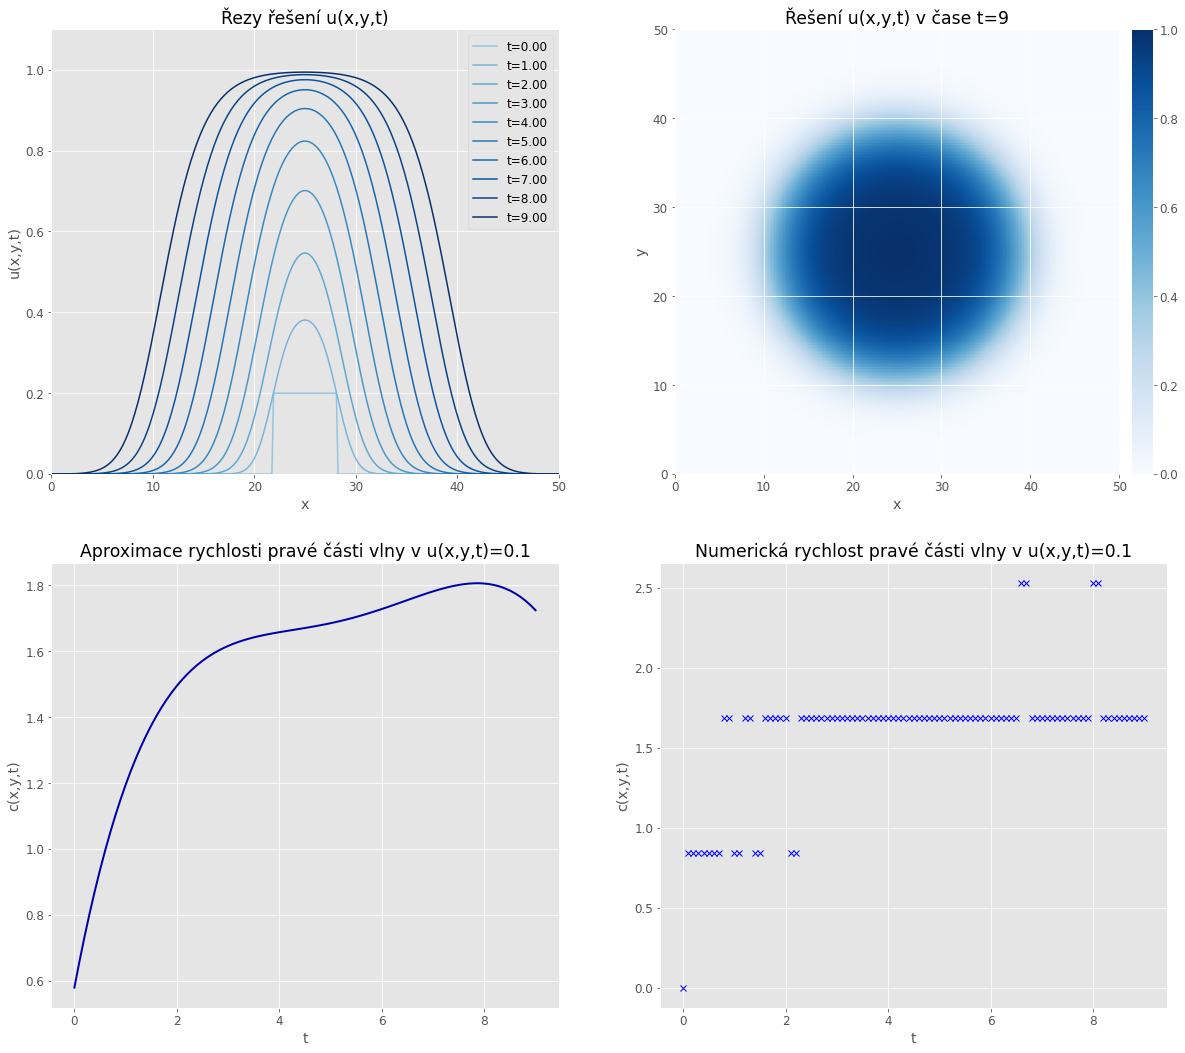

In [7]:
result = fksolve(iv_func = lambda x,y: .2, u_level=0.1, tracker_int=0.1)

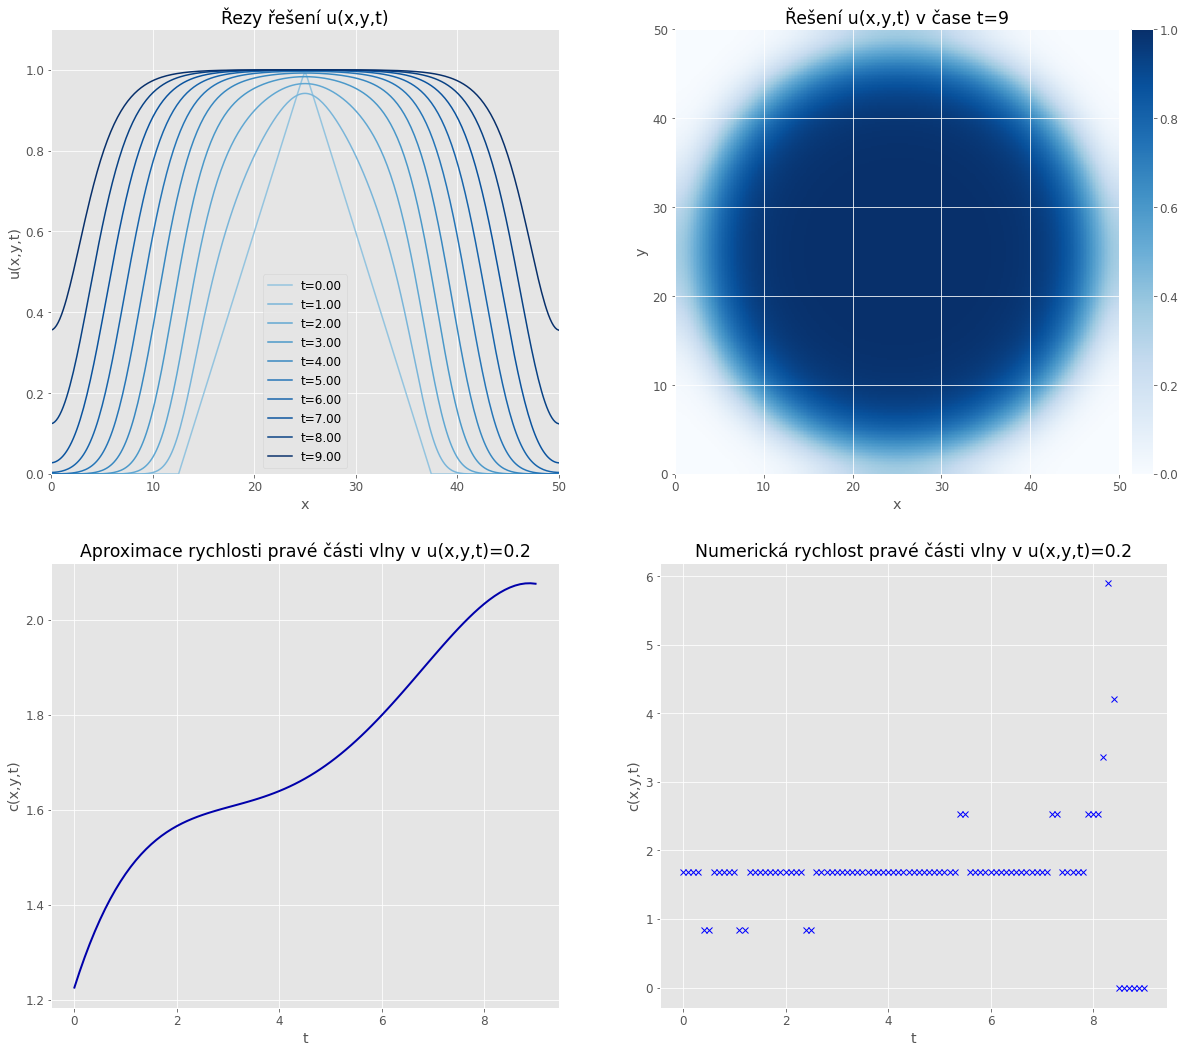

In [20]:
result = fksolve(iv_size=150,
                 iv_func = lambda x, y: 1-np.sqrt(x**2+y**2))

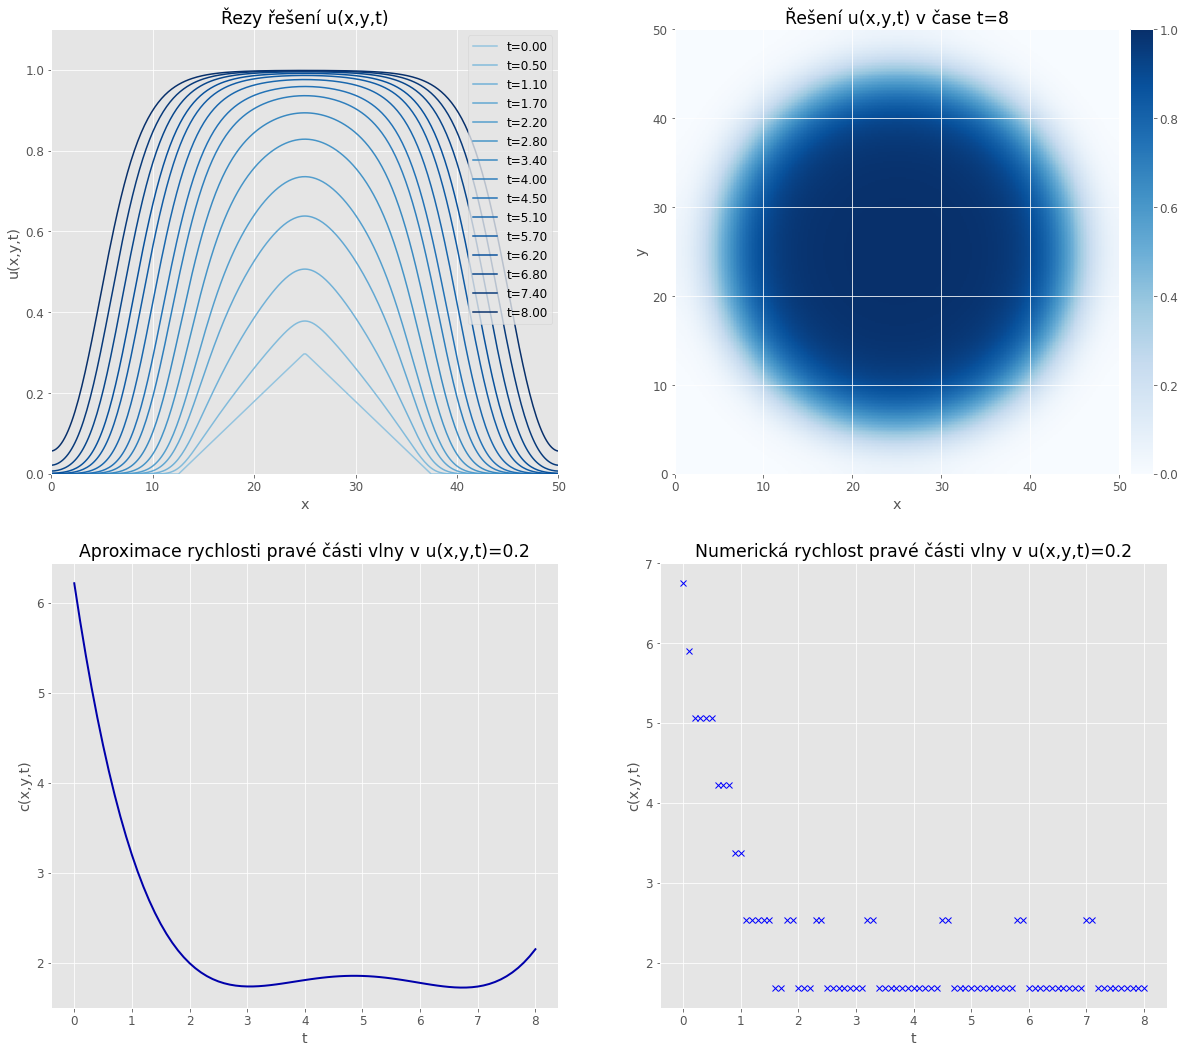

In [9]:
result, storage = fksolve(iv_size=150,
                 max_time=8,
                 slice_num=15,
                 iv_func = lambda x, y: .3*(1-np.sqrt(x**2+y**2)))

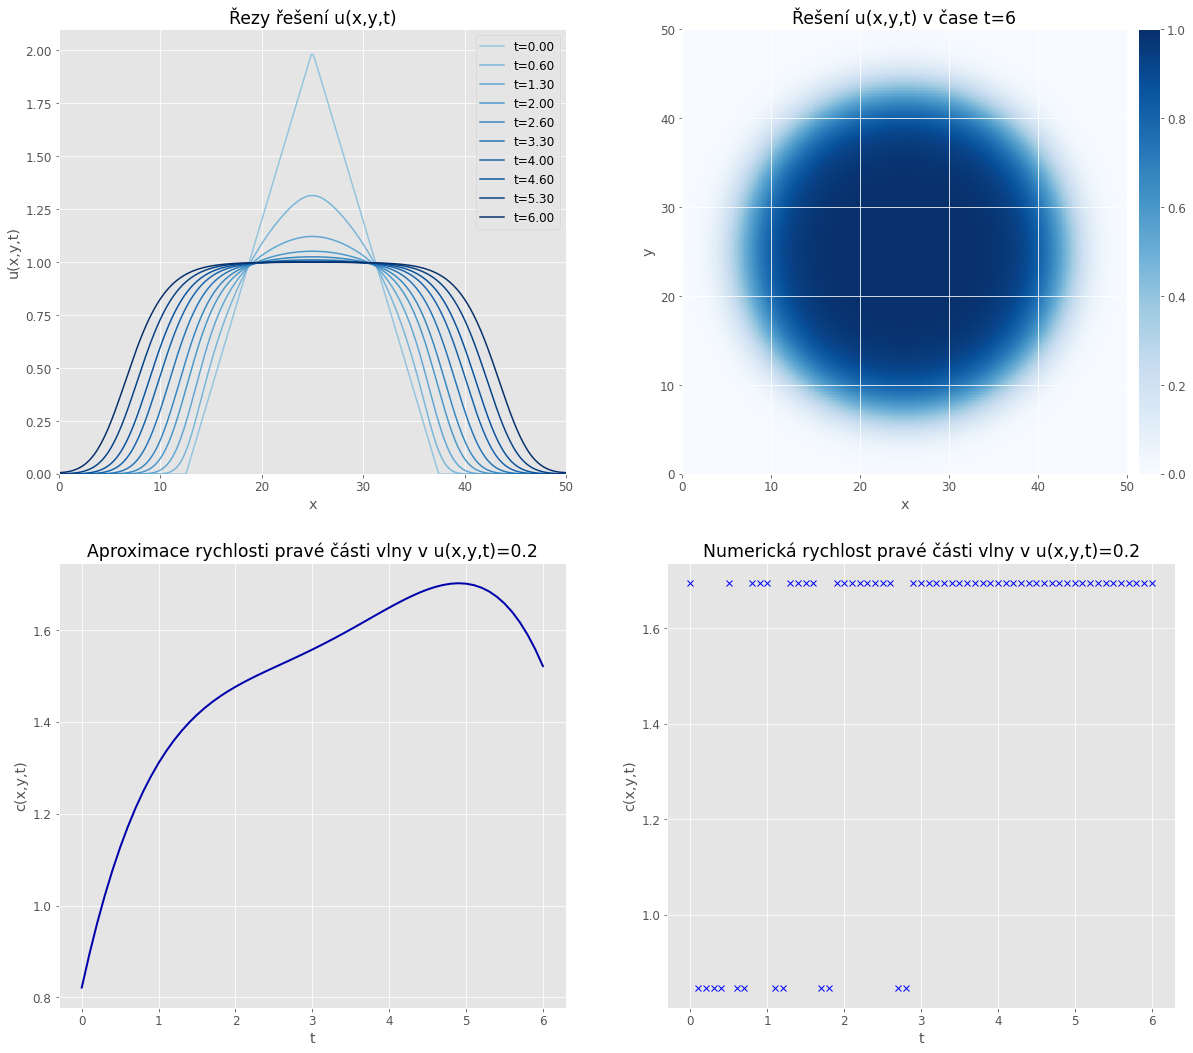

In [12]:
result, storage = fksolve(iv_size=150,
                 max_time=6,
                 slice_num=10,
                 iv_func = lambda x, y: 2*(1-np.sqrt(x**2+y**2)),
                 ylim=2.1)

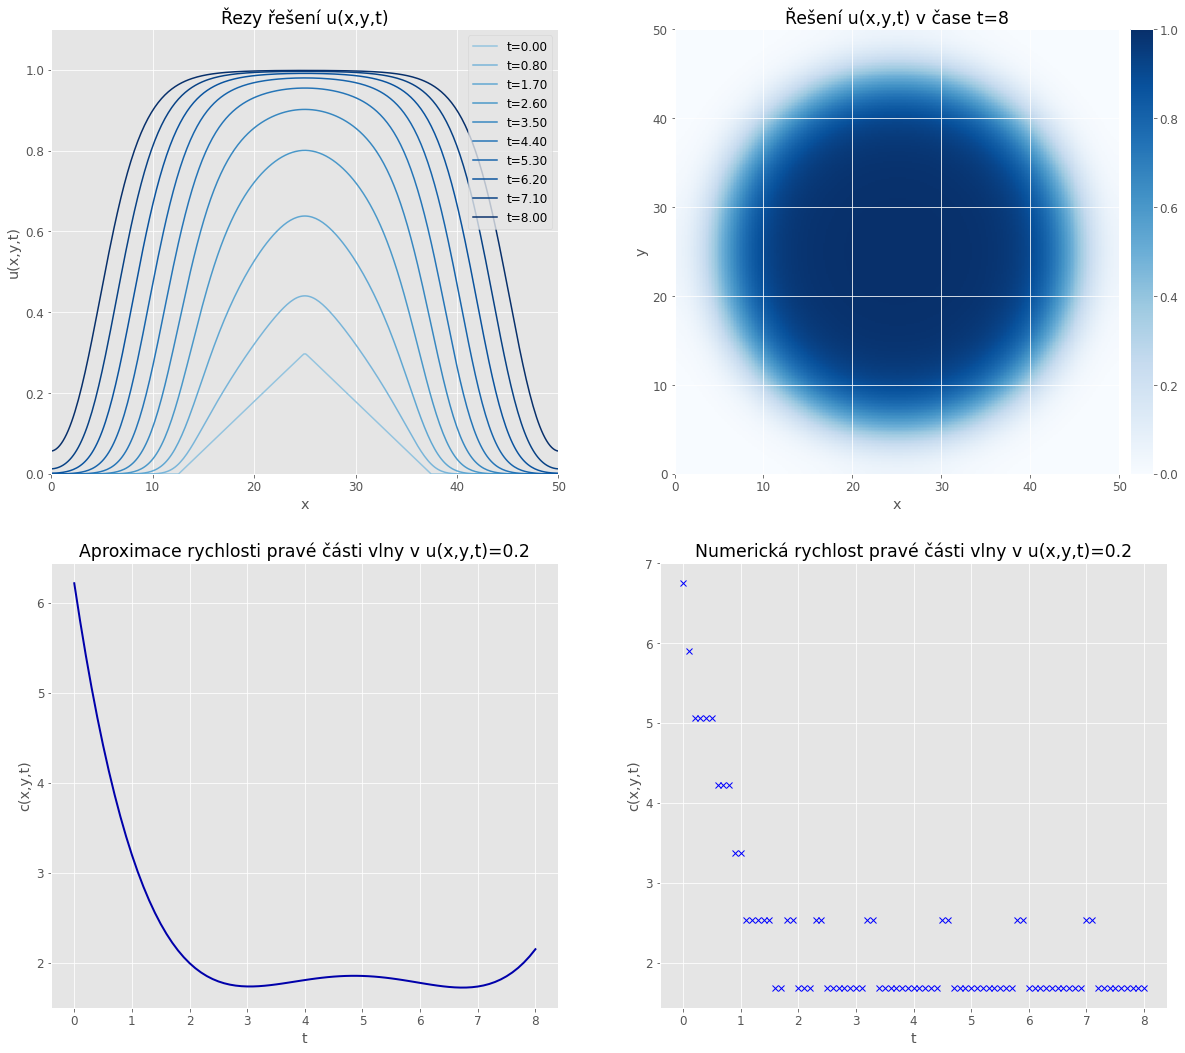

In [11]:
result = fksolve(iv_size=150,
                 max_time=8,
                 slice_num=10,
                 iv_func = lambda x, y: .3*(1-np.sqrt(x**2+y**2)))

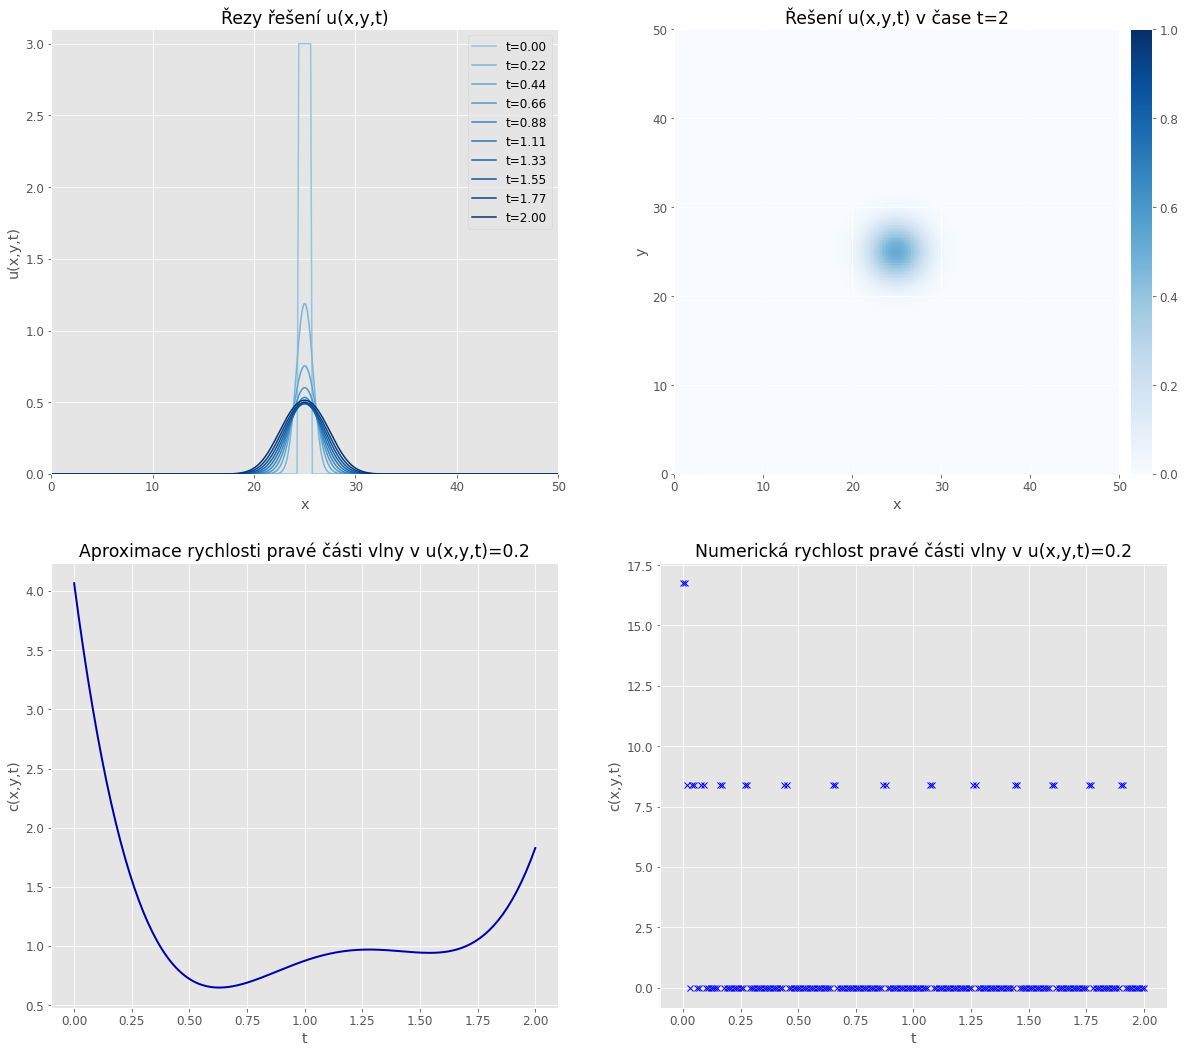

In [18]:
result = fksolve(iv_size=10,
                 max_time=2,
                 slice_num=10,
                 iv_func = lambda x, y: 3, 
                 ylim=3.1,
                 tracker_int=.01)